In [17]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder , MinMaxScaler ,FunctionTransformer ,OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [2]:

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('./accepted_2007_to_2018Q4.csv')
data.head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_464\916950331.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./accepted_2007_to_2018Q4.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [4]:
columns_to_keep = ['loan_amnt','int_rate','installment','emp_title','emp_length','home_ownership','annual_inc','loan_status','purpose','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies','zip_code','addr_state', 'grade' , 'collections_12_mths_ex_med' , 'earliest_cr_line','issue_d']

# 컬럼 제외하고 나머지 삭제
data.drop(columns=[col for col in data.columns if col not in columns_to_keep], inplace=True)

In [5]:
data = data.dropna()

In [6]:
target_1 = {'Fully Paid':0 , 'Current':1 , 'Charged Off':2, 'Late (31-120 days)' : 3 , 'In Grace Period': 4, 'Late (16-30 days)':5, 'Does not meet the credit policy. Status:Fully Paid':6 , 'Does not meet the credit policy. Status:Charged Off':7,'Default': 8 }
data['loan_status']= data['loan_status'].map(target_1)

C:\Users\user\AppData\Local\Temp\ipykernel_464\4104792836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loan_status']= data['loan_status'].map(target_1)


In [7]:
y = data['loan_status']

#data= data.drop('loan_status' , axis = 1)
X = data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044534 entries, 0 to 2260698
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   int_rate                    float64
 2   installment                 float64
 3   grade                       object 
 4   emp_title                   object 
 5   emp_length                  object 
 6   home_ownership              object 
 7   annual_inc                  float64
 8   issue_d                     object 
 9   loan_status                 int64  
 10  purpose                     object 
 11  zip_code                    object 
 12  addr_state                  object 
 13  dti                         float64
 14  earliest_cr_line            object 
 15  open_acc                    float64
 16  pub_rec                     float64
 17  revol_bal                   float64
 18  revol_util                  float64
 19  total_acc            

In [9]:
y.value_counts(dropna=False)

0    974477
1    799478
2    239537
3     19414
4      7753
5      3841
8        34
Name: loan_status, dtype: int64

In [10]:
data = data[data['annual_inc'] <= 250000]
data = data[data['dti'] <= 50]
data = data[data['open_acc'] <= 40]
data = data[data['total_acc'] <= 80]
data = data[data['revol_util'] <= 120]
data = data[data['revol_bal'] <= 250000]

In [11]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format = '%b-%Y')
data['issue_d'] = pd.to_datetime(data['issue_d'],format = '%b-%Y')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004758 entries, 0 to 2260698
Data columns (total 23 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   loan_amnt                   float64       
 1   int_rate                    float64       
 2   installment                 float64       
 3   grade                       object        
 4   emp_title                   object        
 5   emp_length                  object        
 6   home_ownership              object        
 7   annual_inc                  float64       
 8   issue_d                     datetime64[ns]
 9   loan_status                 int64         
 10  purpose                     object        
 11  zip_code                    object        
 12  addr_state                  object        
 13  dti                         float64       
 14  earliest_cr_line            datetime64[ns]
 15  open_acc                    float64       
 16  pub_rec           

In [13]:
import pandas as pd
from datetime import datetime

data['cr_line_period'] = (datetime.now() - data['earliest_cr_line']).dt.days
data['issue_d_period'] = (datetime.now() - data['issue_d']).dt.days

In [14]:
data.drop('earliest_cr_line' , axis = 1 , inplace= True)
data.drop('issue_d' , axis= 1 , inplace= True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004758 entries, 0 to 2260698
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   int_rate                    float64
 2   installment                 float64
 3   grade                       object 
 4   emp_title                   object 
 5   emp_length                  object 
 6   home_ownership              object 
 7   annual_inc                  float64
 8   loan_status                 int64  
 9   purpose                     object 
 10  zip_code                    object 
 11  addr_state                  object 
 12  dti                         float64
 13  open_acc                    float64
 14  pub_rec                     float64
 15  revol_bal                   float64
 16  revol_util                  float64
 17  total_acc                   float64
 18  collections_12_mths_ex_med  float64
 19  mort_acc             

In [16]:
emp_length_1 = {'< 1 year': 1 , '1 year': 2 , '2 years' : 3 , '3 years': 4 , '4 years' : 5 , '5 years' : 6 , '6 years' : 7 , '7 years': 8 , '8 years':9 ,'9 years': 10 , '10+ years':11}

data['emp_length'] = data['emp_length'].map(emp_length_1)

In [17]:
grade_1 = {'A' : 0 ,'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5, 'G' : 6}

data['grade'] = data['grade'].map(grade_1)

In [18]:
from sklearn.preprocessing import OneHotEncoder

ohe_feature = ['home_ownership'  , 'purpose' , 'zip_code' , 'addr_state']

ohe = OneHotEncoder()

ohe_num = ohe.fit_transform(data[ohe_feature])

In [19]:
data.drop(ohe_feature, axis = 1 , inplace = True)

In [20]:
from sklearn.preprocessing import OrdinalEncoder

ord = OrdinalEncoder()

ord_feature = ['cr_line_period' , 'issue_d_period']

data[ord_feature]= ord.fit_transform(data[ord_feature]) 

In [21]:
emp_title_other = data['emp_title']
emp_title_other = emp_title_other.to_frame()
emp_title_other_ = emp_title_other.applymap(lambda x: 1 if pd.notnull(x) else x)
emp_title_other_.fillna(0 , inplace= True)
data['emp'] = emp_title_other_

In [22]:
data = data.drop('emp_title',  axis = 1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004758 entries, 0 to 2260698
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   int_rate                    float64
 2   installment                 float64
 3   grade                       int64  
 4   emp_length                  int64  
 5   annual_inc                  float64
 6   loan_status                 int64  
 7   dti                         float64
 8   open_acc                    float64
 9   pub_rec                     float64
 10  revol_bal                   float64
 11  revol_util                  float64
 12  total_acc                   float64
 13  collections_12_mths_ex_med  float64
 14  mort_acc                    float64
 15  pub_rec_bankruptcies        float64
 16  cr_line_period              float64
 17  issue_d_period              float64
 18  emp                         int64  
dtypes: float64(15), int64

In [24]:
from sklearn.preprocessing import MinMaxScaler

Mm_feature = ['emp_length', 'grade', 'collections_12_mths_ex_med' , 'cr_line_period','issue_d_period']

Mm = MinMaxScaler()

data[Mm_feature] = Mm.fit_transform(data[Mm_feature])

In [25]:
from sklearn.preprocessing import StandardScaler

num_features = ['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc']

std_saller = StandardScaler()

data[num_features] = std_saller.fit_transform(data[num_features])


In [26]:
from scipy import sparse

data_sparse = sparse.hstack([sparse.csr_matrix(data),
                               ohe_num
                               ],
                               format = 'csr')

In [27]:
#data.to_csv('./DBSCAN_7_Muti_train.csv', index = False)

# DBSCAN

### 1. 7 class

- 수정하기 ////////////// 차원 축소 후 -> 군집화 수행

In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv('./DBSCAN_7_Muti_train.csv')
df

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mort_acc,pub_rec_bankruptcies,cr_line_period,issue_d_period,emp
0,-1.267822,0.180881,-1.230018,0.333333,1.0,-0.530323,0,-1.458212,-0.850144,-0.343383,-0.761695,-0.854114,-0.951899,0.0,-0.282460,0.0,0.201094,0.444444,1
1,1.049657,-0.232440,1.409126,0.333333,1.0,-0.277129,0,-0.280036,1.871066,-0.343383,0.308770,-1.282657,1.178984,0.0,1.316633,0.0,0.261286,0.444444,1
2,0.533441,-0.482499,-0.058045,0.166667,1.0,-0.327768,0,-0.892920,-1.031558,-0.343383,-0.469599,0.227448,-0.525722,0.0,1.849664,0.0,0.250342,0.444444,1
3,2.180938,0.358609,1.445539,0.333333,1.0,0.862247,1,-0.163960,0.238340,-0.343383,-0.473434,-1.592841,-0.610957,0.0,-0.282460,0.0,0.117647,0.444444,1
4,-0.520957,1.929228,-0.598365,0.833333,0.3,0.721293,0,0.800635,0.056926,-0.343383,0.335038,0.566202,0.923278,0.0,2.382695,0.0,0.285910,0.444444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004753,0.972774,-0.067112,0.361493,0.333333,0.7,0.482455,1,0.132035,-1.212972,-0.343383,1.908944,1.378394,2.542750,0.0,-0.815491,0.0,0.261286,0.320988,1
2004754,0.972774,-0.542430,0.256419,0.166667,1.0,0.811608,1,1.911487,2.233894,1.410475,0.319929,-0.474547,2.883691,0.0,1.316633,0.0,0.406293,0.320988,1
2004755,2.730103,-0.542430,1.557804,0.166667,0.9,3.824623,1,-0.664249,-1.212972,-0.343383,-0.425876,0.582527,1.093749,0.0,0.783602,0.0,0.340629,0.320988,1
2004756,0.972774,0.284211,0.441207,0.333333,0.6,0.862247,2,-0.020025,-0.305902,1.410475,0.089640,0.713131,0.582337,0.0,0.250571,1.0,0.268126,0.320988,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004758 entries, 0 to 2004757
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   int_rate                    float64
 2   installment                 float64
 3   grade                       float64
 4   emp_length                  float64
 5   annual_inc                  float64
 6   loan_status                 int64  
 7   dti                         float64
 8   open_acc                    float64
 9   pub_rec                     float64
 10  revol_bal                   float64
 11  revol_util                  float64
 12  total_acc                   float64
 13  collections_12_mths_ex_med  float64
 14  mort_acc                    float64
 15  pub_rec_bankruptcies        float64
 16  cr_line_period              float64
 17  issue_d_period              float64
 18  emp                         int64  
dtypes: float64(17), int64

In [4]:

feature_names = ['loan_amnt' , 'int_rate','installment','grade','emp_length','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','collections_12_mths_ex_med','mort_acc','pub_rec_bankruptcies','cr_line_period','issue_d_period','emp']
df_db = pd.DataFrame(data = df, columns = feature_names)
df_db['loan_status'] = df['loan_status']
df_db.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mort_acc,pub_rec_bankruptcies,cr_line_period,issue_d_period,emp,loan_status
0,-1.267822,0.180881,-1.230018,0.333333,1.0,-0.530323,-1.458212,-0.850144,-0.343383,-0.761695,-0.854114,-0.951899,0.0,-0.282460,0.0,0.201094,0.444444,1,0
1,1.049657,-0.232440,1.409126,0.333333,1.0,-0.277129,-0.280036,1.871066,-0.343383,0.308770,-1.282657,1.178984,0.0,1.316633,0.0,0.261286,0.444444,1,0
2,0.533441,-0.482499,-0.058045,0.166667,1.0,-0.327768,-0.892920,-1.031558,-0.343383,-0.469599,0.227448,-0.525722,0.0,1.849664,0.0,0.250342,0.444444,1,0
3,2.180938,0.358609,1.445539,0.333333,1.0,0.862247,-0.163960,0.238340,-0.343383,-0.473434,-1.592841,-0.610957,0.0,-0.282460,0.0,0.117647,0.444444,1,1
4,-0.520957,1.929228,-0.598365,0.833333,0.3,0.721293,0.800635,0.056926,-0.343383,0.335038,0.566202,0.923278,0.0,2.382695,0.0,0.285910,0.444444,1,0


In [5]:
df['loan_status'].value_counts()

0    959566
1    778267
2    236706
3     18911
4      7528
5      3748
8        32
Name: loan_status, dtype: int64

eps의 적절한 값 찾기

In [6]:
#from sklearn.neighbors import NearestNeighbors
# k-거리 계산
#neighbors = NearestNeighbors(n_neighbors=2)
#neighbors_fit = neighbors.fit(df)
#distances, indices = neighbors_fit.kneighbors(df)

# 거리 정렬 및 그래프 그리기
#distances = np.sort(distances, axis=0)
#distances = distances[:, 1]
#plt.plot(distances)
#plt.xlabel('Points')
#plt.ylabel('Distance to 2nd Nearest Neighbor')
#plt.show()

In [7]:

#eps = [1, 4, 8, 12, 20]

#for i in eps:
#    dbscan = DBSCAN(eps=i, min_samples=33, metric='euclidean')
#    cluster_labels = dbscan.fit_predict(df)  
    
#    cluster_id = pd.DataFrame(cluster_labels, columns=['cluster'])
    
#    d2 = pd.concat([df, cluster_id], axis=1)
#    d2.columns = list(df.columns) + ["cluster"]
    
    
#    sns.scatterplot(x=d2[df.columns[0]], y=d2[df.columns[1]], hue=d2['cluster'], legend="full")
#    plt.title('DBScan with eps {}'.format(i))
#    plt.show()
    
#    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d2.iloc[:, :-1], d2['cluster'])))
#    print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d2.iloc[:, :-1], d2['cluster'])))


In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN( 
    eps=0.7,
    min_samples=8,
    metric='euclidean'     
)

dbscan_labels = dbscan.fit_predict(df)
df_db['dbscan_cluster'] = dbscan_labels

df_db.head(5)



,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mort_acc,pub_rec_bankruptcies,cr_line_period,issue_d_period,emp,loan_status,dbscan_cluster
0,-1.267822,0.180881,-1.230018,0.333333,1.0,-0.530323,-1.458212,-0.850144,-0.343383,-0.761695,-0.854114,-0.951899,0.0,-0.282460,0.0,0.201094,0.444444,1,0,0
1,1.049657,-0.232440,1.409126,0.333333,1.0,-0.277129,-0.280036,1.871066,-0.343383,0.308770,-1.282657,1.178984,0.0,1.316633,0.0,0.261286,0.444444,1,0,-1
2,0.533441,-0.482499,-0.058045,0.166667,1.0,-0.327768,-0.892920,-1.031558,-0.343383,-0.469599,0.227448,-0.525722,0.0,1.849664,0.0,0.250342,0.444444,1,0,-1
3,2.180938,0.358609,1.445539,0.333333,1.0,0.862247,-0.163960,0.238340,-0.343383,-0.473434,-1.592841,-0.610957,0.0,-0.282460,0.0,0.117647,0.444444,1,1,-1
4,-0.520957,1.929228,-0.598365,0.833333,0.3,0.721293,0.800635,0.056926,-0.343383,0.335038,0.566202,0.923278,0.0,2.382695,0.0,0.285910,0.444444,1,0,-1


In [9]:
df['dbscan_cluster'] = dbscan_labels

In [10]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^' , '%' , '$' , '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

In [11]:
df_db['dbscan_cluster'].value_counts()

-1       1439405
 0        277742
 2        221216
 1         29921
 3         14264
          ...   
 456           2
 394           2
 143           2
 214           2
 1065          2
Name: dbscan_cluster, Length: 1433, dtype: int64

In [23]:
df_db.head(5)

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,...,collections_12_mths_ex_med,mort_acc,pub_rec_bankruptcies,cr_line_period,issue_d_period,emp,loan_status,dbscan_cluster,ftr1,ftr2
0,-1.267822,0.180881,-1.230018,0.333333,1.0,-0.530323,-1.458212,-0.850144,-0.343383,-0.761695,...,0.0,-0.282460,0.0,0.201094,0.444444,1,0,0,-3.434410,-2.509620
1,1.049657,-0.232440,1.409126,0.333333,1.0,-0.277129,-0.280036,1.871066,-0.343383,0.308770,...,0.0,1.316633,0.0,0.261286,0.444444,1,0,-1,-4.437797,2.303193
2,0.533441,-0.482499,-0.058045,0.166667,1.0,-0.327768,-0.892920,-1.031558,-0.343383,-0.469599,...,0.0,1.849664,0.0,0.250342,0.444444,1,0,-1,-4.435694,-0.165126
3,2.180938,0.358609,1.445539,0.333333,1.0,0.862247,-0.163960,0.238340,-0.343383,-0.473434,...,0.0,-0.282460,0.0,0.117647,0.444444,1,1,-1,-4.436643,1.421688
4,-0.520957,1.929228,-0.598365,0.833333,0.3,0.721293,0.800635,0.056926,-0.343383,0.335038,...,0.0,2.382695,0.0,0.285910,0.444444,1,0,-1,-4.437766,1.097376


In [25]:
df_db['dbscan_cluster'].value_counts()

-1       1439405
 0        277742
 2        221216
 1         29921
 3         14264
          ...   
 456           2
 394           2
 143           2
 214           2
 1065          2
Name: dbscan_cluster, Length: 1433, dtype: int64

In [22]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components= 2)

lda_transformed = lda.fit_transform(df, df_db['loan_status'])

df_db['ftr1'] = lda_transformed[:,0]
df_db['ftr2'] = lda_transformed[:,1]

visualize_cluster_plot(dbscan, df_db, 'dbscan_cluster', iscenter=False)

ValueError: Negative values in data passed to LatentDirichletAllocation.fit

ValueError: Unrecognized marker style '%'

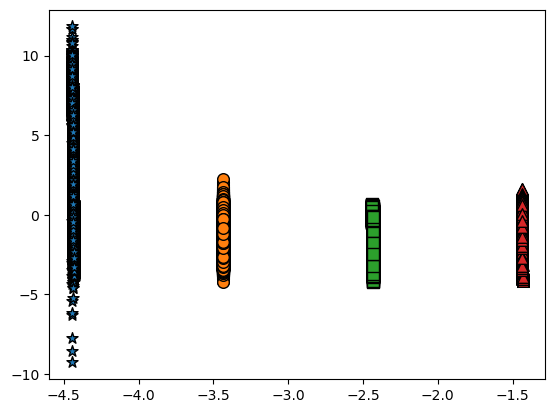

In [18]:
from sklearn.decomposition import PCA
import numpy as np

# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(df)

# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
df_db['ftr1'] = pca_transformed[:,0]
df_db['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, df_db, 'dbscan_cluster', iscenter=False)